# Importing necessary libraries

In [4]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns #import seaborn library for statistical visualization
import matplotlib.pyplot as plt

# loading the dataset

In [5]:
data=pd.read_csv(r"C:\Users\Kiran\Downloads\Predict Term Deposit (1).csv")

# Getting the no of rows and columns

In [6]:
data.shape

(45211, 18)

# Displaying top five rows of the dataset

In [4]:
data.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscribed
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Displays the last 5 rows of the dataset

In [5]:
data.tail()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscribed
45206,46207,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,46208,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,46209,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,46210,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,46211,37.0,entrepreneur,married,secondary,no,2971.0,no,no,cellular,17,nov,361,2,188,11,other,no


# Data Cleaning: check for the Missing Values

In [6]:
data.isnull()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscribed
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Checking total null values in the dataset

In [7]:
data.isnull().sum().sum()


12

# Dropping null values

In [8]:
data=data.dropna()

In [9]:
data.isnull().sum().sum()

0

# There are no missing values left in the dataset after dropping null values

# checking duplicates

In [10]:
data.duplicated().sum()

0

In [11]:
import numpy as np
from sklearn.impute import SimpleImputer
# Step 1: Handling Incorrect Age Values
# Replace 999 with NaN in the age column
data['age'].replace(999, np.nan, inplace=True)
# Impute missing ages with the median
age_imputer = SimpleImputer(strategy='median')
data['age'] = age_imputer.fit_transform(data[['age']]).ravel()

In [12]:
# Display the first few rows after cleaning to review changes
data.head(), data['job'].unique(), data['education'].unique(), data['contact'].unique()


(     Id   age           job  marital  education default  balance housing loan  \
 0  1001  39.0    management  married   tertiary      no   2143.0     yes   no   
 1  1002  44.0    technician   single  secondary      no     29.0     yes   no   
 2  1003  33.0  entrepreneur  married  secondary      no      2.0     yes  yes   
 3  1004  47.0   blue-collar  married    unknown      no   1506.0     yes   no   
 4  1005  33.0       unknown   single    unknown      no      1.0      no   no   
 
    contact  day month  duration  campaign  pdays  previous poutcome Subscribed  
 0  unknown    5   may       261         1     -1         0  unknown         no  
 1  unknown    5   may       151         1     -1         0  unknown         no  
 2  unknown    5   may        76         1     -1         0  unknown         no  
 3  unknown    5   may        92         1     -1         0  unknown         no  
 4  unknown    5   may       198         1     -1         0  unknown         no  ,
 array(['mana

In [13]:
replace_contact = data['contact'].mode()[0]

# Replace unknown values in the 'contact' column with the most frequent value
data['contact'].replace({'unknown': replace_contact}, inplace=True)

In [14]:

replace_education = data['education'].mode()[0]
data['education'].replace({'unknown': replace_education}, inplace=True)


In [15]:
replace_poutcome = data['poutcome'].mode()[0]
data['poutcome'].replace({'unknown': replace_education}, inplace=True)

In [16]:
replace_job = data['job'].mode()[0]
data['job'].replace({'unknown': replace_job}, inplace=True)

In [17]:
data.head(10)

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscribed
0,1001,39.0,management,married,tertiary,no,2143.0,yes,no,cellular,5,may,261,1,-1,0,secondary,no
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,cellular,5,may,151,1,-1,0,secondary,no
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,cellular,5,may,76,1,-1,0,secondary,no
3,1004,47.0,blue-collar,married,secondary,no,1506.0,yes,no,cellular,5,may,92,1,-1,0,secondary,no
4,1005,33.0,blue-collar,single,secondary,no,1.0,no,no,cellular,5,may,198,1,-1,0,secondary,no
5,1006,35.0,management,married,tertiary,no,231.0,yes,no,cellular,5,may,139,1,-1,0,secondary,no
6,1007,28.0,management,single,tertiary,no,447.0,yes,yes,cellular,5,may,217,1,-1,0,secondary,no
10,1011,41.0,admin.,divorced,secondary,no,270.0,yes,no,cellular,5,may,222,1,-1,0,secondary,no
11,1012,29.0,admin.,single,secondary,no,390.0,yes,no,cellular,5,may,137,1,-1,0,secondary,no
12,1013,53.0,technician,married,secondary,no,6.0,yes,no,cellular,5,may,517,1,-1,0,secondary,no


In [18]:
data.to_csv("CLEANED_DATA.csv", index=False)


# Obtaining the column names of the dataset

In [19]:
data.columns

Index(['Id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'Subscribed'],
      dtype='object')

In [20]:
#dropping ID 
data=data.drop("Id",axis=1)

# Displaying data frame structure

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45200 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         45200 non-null  float64
 1   job         45200 non-null  object 
 2   marital     45200 non-null  object 
 3   education   45200 non-null  object 
 4   default     45200 non-null  object 
 5   balance     45200 non-null  float64
 6   housing     45200 non-null  object 
 7   loan        45200 non-null  object 
 8   contact     45200 non-null  object 
 9   day         45200 non-null  int64  
 10  month       45200 non-null  object 
 11  duration    45200 non-null  int64  
 12  campaign    45200 non-null  int64  
 13  pdays       45200 non-null  int64  
 14  previous    45200 non-null  int64  
 15  poutcome    45200 non-null  object 
 16  Subscribed  45200 non-null  object 
dtypes: float64(2), int64(5), object(10)
memory usage: 6.2+ MB


# Getting statistical summary of the data

In [22]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45200.0,40.933053,10.622803,-1.0,33.0,39.0,48.0,95.0
balance,45200.0,1362.565686,3045.076372,-8019.0,72.0,449.0,1428.0,102127.0
day,45200.0,15.809049,8.321781,1.0,8.0,16.0,21.0,31.0
duration,45200.0,258.141637,257.438318,0.0,103.0,180.0,319.0,4918.0
campaign,45200.0,2.764270,3.098276,1.0,1.0,2.0,3.0,63.0
pdays,45200.0,40.207854,100.138866,-1.0,-1.0,-1.0,-1.0,871.0
previous,45200.0,0.580465,2.303704,0.0,0.0,0.0,0.0,275.0


# Checking the data types of all the columns

In [23]:
data.dtypes

age           float64
job            object
marital        object
education      object
default        object
balance       float64
housing        object
loan           object
contact        object
day             int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
Subscribed     object
dtype: object

# Data Exploration (EDA)

#converting data types in suitable (category) types

In [24]:
data["job"]=data["job"].astype("category")
data["marital"]=data["marital"].astype("category")
data["education"]=data["education"].astype("category")
data["default"]=data["default"].astype("category")
data["housing"]=data["housing"].astype("category")
data["loan"]=data["loan"].astype("category")
data["contact"]=data["contact"].astype("category")
data["poutcome"]=data["poutcome"].astype("category")
data["Subscribed"]=data["Subscribed"].astype("category")

# Again checking the data types

In [25]:
data.dtypes

age            float64
job           category
marital       category
education     category
default       category
balance        float64
housing       category
loan          category
contact       category
day              int64
month           object
duration         int64
campaign         int64
pdays            int64
previous         int64
poutcome      category
Subscribed    category
dtype: object

# To Know unique values

In [26]:
for col in data.columns:
    print(col,' ',data[col].nunique())

age   78
job   11
marital   3
education   3
default   2
balance   7168
housing   2
loan   2
contact   2
day   31
month   12
duration   1572
campaign   48
pdays   559
previous   41
poutcome   4
Subscribed   2


#*Univariate Analysis*

**Analysis of our target variable 'Subscribed' by finding the percentage of each class**

In [27]:
#Frequency of 'subscribed'
data['Subscribed'].value_counts()

no     39911
yes     5289
Name: Subscribed, dtype: int64

In [28]:
class_values = (data['Subscribed'].value_counts()/data['Subscribed'].value_counts().sum())*100
print(class_values)

no     88.298673
yes    11.701327
Name: Subscribed, dtype: float64


# Observations :The class distribution in the target is ~88.29. This is a clear indication of imbalance.

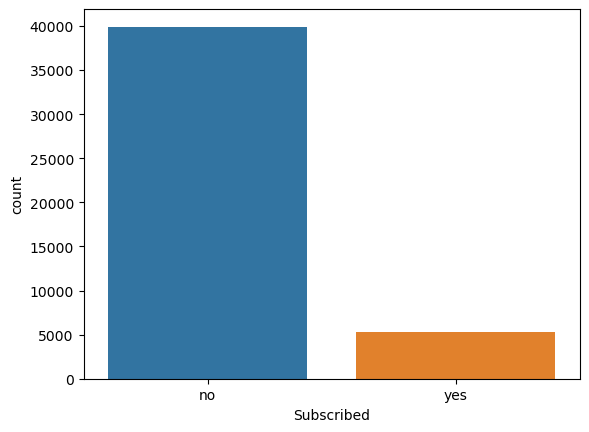

In [29]:
sns.countplot(x ='Subscribed', data = data)
plt.show()

# Normalizing the Subscribed feature

In [30]:
data['Subscribed'].value_counts(normalize=True)

no     0.882987
yes    0.117013
Name: Subscribed, dtype: float64

**From the above analysis we can see that only 5289 people out of 45,200 have subscribed**


# Selecting the categorical column

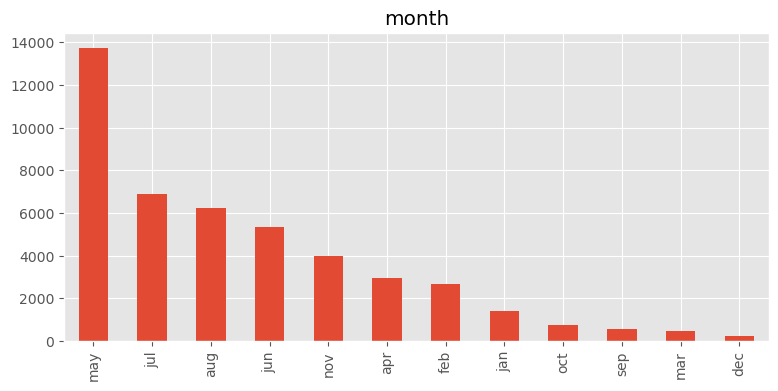

In [31]:
categorical_col = data.select_dtypes(include=['object']).columns
plt.style.use('ggplot')
# Plotting a bar chart for the cateorical variable named as month
for column in categorical_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    data[column].value_counts().plot(kind='bar')
    plt.title(column)

# Data visualization through Pie chart

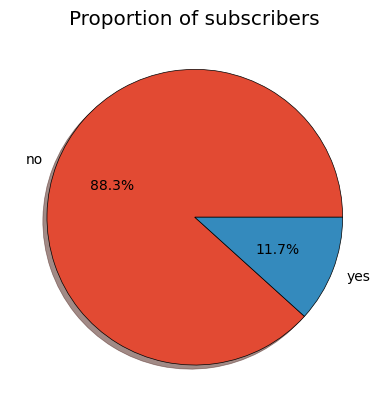

In [32]:
numberofsubscribers=data["Subscribed"].value_counts()
plt.pie(numberofsubscribers,labels=numberofsubscribers.index,
       shadow=True,
       wedgeprops={"edgecolor":"black"},
        autopct='%2.1f%%')
plt.title("Proportion of subscribers")
plt.savefig("pie chart for subscribed.png")
plt.show()

In [33]:
import seaborn as sns #import seaborn library for statistical visualization

# Calculate the correlation matrix

In [34]:
correlation_matrix = data.corr()

# Create a heatmap

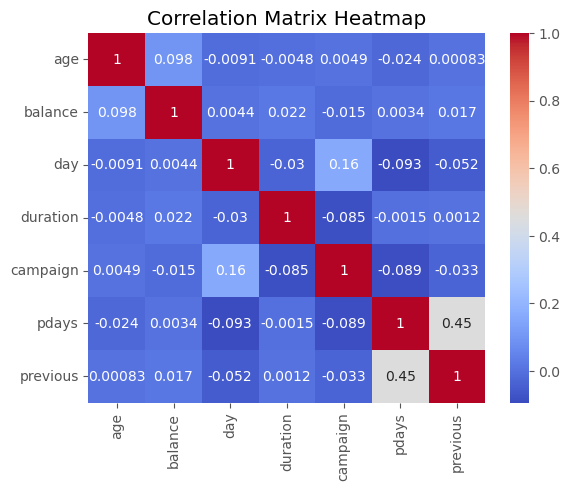

In [35]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.savefig("correlation matrix.png")
plt.show()

**The intersection between rows and columns gives the coorelation coffiecient between those variables. The values lies between -1 and 1. More the values towards -1, the variables are said to have strong negative correlation and more the values towards +1 then the variables are said to have strong postive correlation. According to the above matrix, it does not reveal any clear relationship among age, balance, duration and campaign**.

**To investigate more about correlation, a correlation matrix was plotted with all qualitative variables. Clearly, “campaign" has a strong correlation with “duration”, a moderate correlation with “previous contacts”, and mild correlations between “balance”, “month of contact” and “campaign”**.

# Creating a Countplot

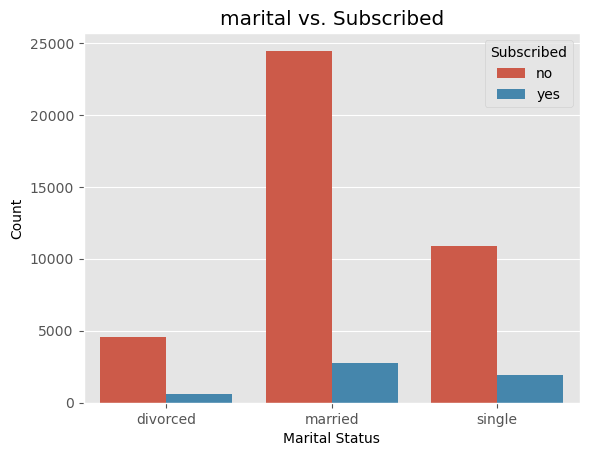

In [36]:
sns.countplot(data=data, x='marital', hue='Subscribed')
plt.title('marital vs. Subscribed')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.savefig("countplot.png")
plt.show()



1.   52% of subscribers are married.
2.   88% of subscribers are either married or single.




# Hypothetical Scenario:
Lets test whether the average call duration differs between customers with and without a housing loan.

Null Hypothesis (H0): The average call duration for customers with a housing loan is equal to the average call duration for customers without a housing loan.

Alternative Hypothesis (H1): The average call duration for customers with a housing loan is different from the average call duration for customers without a housing loan.

In [37]:
#Steps to perform t-test

from scipy import stats

# Separate data for customers with and without a housing loan
with_housing_loan = data[data['housing'] == 'yes']['duration']
without_housing_loan = data[data['housing'] == 'no']['duration']

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(with_housing_loan, without_housing_loan, equal_var=False)

print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

# Define the significance level
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print('Reject the null hypothesis. There is enough evidence to suggest a significant difference.')
else:
    print('Fail to reject the null hypothesis. There is not enough evidence to suggest a significant difference.')


T-Statistic: 1.0614803502887562
P-Value: 0.288477599860248
Fail to reject the null hypothesis. There is not enough evidence to suggest a significant difference.


# Hypothetical Scenario:
Lets test whether the average age differs between customers who subscribed to the term deposit and those who did not.

Null Hypothesis (H0): The average age for customers who subscribed is equal to the average age for customers who did not subscribe.

Alternative Hypothesis (H1): The average age for customers who subscribed is different from the average age for customers who did not subscribe.

from scipy import stats

In [38]:
from scipy import stats

# Separate data for subscribers and non-subscribers
subscribed = data[data['Subscribed'] == 'yes']['age']
not_subscribed = data[data['Subscribed'] == 'no']['age']

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(subscribed, not_subscribed, equal_var=False)

print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

# Define the significance level
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print('Reject the null hypothesis. There is enough evidence to suggest a significant difference.')
else:
    print('Fail to reject the null hypothesis. There is not enough evidence to suggest a significant difference.')


T-Statistic: 4.191244105745272
P-Value: 2.8134551658418543e-05
Reject the null hypothesis. There is enough evidence to suggest a significant difference.


# Hypothetical Scenario:
Determine if there is a significant association between the marital status and the likelihood of subscription ('Subscribed').

Null Hypothesis (H0): There is no association between marital status and subscription status. Alternative Hypothesis (H1): There is a significant association between marital status and subscription status.

Chi-square Test for Independence: The chi-square test is used when we have two categorical variables, and it helps us assess whether these variables are independent or if there is a significant association.

In [39]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['marital'], data['Subscribed'])

# Perform chi-square test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)

Chi-square statistic: 196.8304367092793
P-value: 1.814737164176182e-43


# The p-value associated with the chi-square statistic is extremely small. This indicates that the observed association between marital status and subscription status is highly unlikely to have occurred by chance alone.

With such a small p-value, we would typically reject the null hypothesis. Therefore, we have sufficient evidence to suggest that there is a significant association between marital status and the likelihood of subscription.

# Hypothetical Scenario:
In order to determine the relationship between the 'education' variable (categorical) and the target variable 'Subscribed', we use a chi-square test for independence.

Null Hypothesis (H0): There is no association between education and subscription status.

Alternative Hypothesis (H1): There is a significant association between education and subscription status.

In [40]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['education'], data['Subscribed'])

# Perform chi-square test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)

Chi-square statistic: 223.9091232844507
P-value: 2.3919475640943953e-49


# The chi-square test results indicate a highly significant association between the 'education' variable and the subscription status. A higher chi-square value indicates a stronger association.

With such a small p-value, you would reject the null hypothesis. Therefore, you have sufficient evidence to suggest that there is a significant association between education level and the likelihood of subscription.

# Hypothetical Scenario:
Null Hypothesis (H0): There is no difference in the mean 'balance' between subscribed and not subscribed groups.

Alternative Hypothesis (H1): There is a significant difference in the mean 'balance' between subscribed and not subscribed groups.

In [41]:
from scipy.stats import ttest_ind

# Extract the 'balance' variable
balance_subscribed = data[data['Subscribed'] == 'yes']['balance']
balance_not_subscribed = data[data['Subscribed'] == 'no']['balance']

# Perform t-test
t_statistic, p_value = ttest_ind(balance_subscribed, balance_not_subscribed, equal_var=False)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 9.927045973061484
P-value: 4.674170364789255e-23


# The result indicates strong evidence against the null hypothesis which suggests that the 'balance' variable is an important factor in determining whether a customer subscribes or not

# Hypothetical Scnerio:
In order to check the relationship between the 'contact' variable (categorical) and the 'Subscribed' variable (binary), we use a chi-square test for independence.

Null Hypothesis (H0): There is no association between the 'contact' and 'Subscribed' variables.

Alternative Hypothesis (H1): There is a significant association between the 'contact' and 'Subscribed' variables.

In [42]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['contact'], data['Subscribed'])

# Perform chi-square test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)


Chi-square statistic: 8.707086907645238
P-value: 0.0031697532991460525


# Reject the null hypothesis.

The result implies that the mode of contact may have a significant impact on whether a customer subscribes or not.

# To check the distribution of Day variable¶

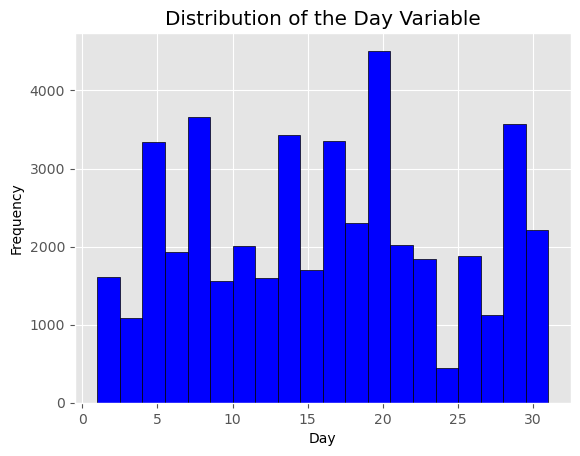

count    45200.000000
mean        15.809049
std          8.321781
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64


In [43]:
import matplotlib.pyplot as plt

# Plot a histogram
plt.hist(data['day'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of the Day Variable')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.show()
# Display summary statistics
print(data['day'].describe())



# Mann-Whitney U Test: to compare the means of 'day' between two groups as the distribution of day variable is not equal. (e.g., subscribed vs. not subscribed):

In [44]:
from scipy.stats import mannwhitneyu
subscribed_days = data[data['Subscribed'] == 'yes']['day']
not_subscribed_days = data[data['Subscribed'] == 'no']['day']

# Perform Mann-Whitney U test
u_statistic, p_value = mannwhitneyu(subscribed_days, not_subscribed_days, alternative='two-sided')

# Print the results
print("U-statistic:", u_statistic)
print("P-value:", p_value)

U-statistic: 99924595.5
P-value: 2.839127701353291e-10


# With such a small p-value, we would typically reject the null hypothesis. So,we have sufficient evidence to suggest that there is a significant difference in the 'day' variable between the subscribed and not subscribed groups.

This result suggests that the distribution of the 'day' variable differs significantly between customers who subscribed and those who did not.

# Hypothesis: Is there a significant association between 'month' and 'Subscribed'?
Null Hypothesis (H0): There is no association between the 'month' and 'Subscribed' variables.

Alternative Hypothesis (H1): There is a significant association between the 'month' and 'Subscribed' variables.

If the p-value is below a chosen significance level (commonly 0.05), you would reject the null hypothesis,

In [45]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['month'], data['Subscribed'])

# Perform chi-square test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)


Chi-square statistic: 3060.2163970080155
P-value: 0.0


# With a p-value which is zero, we would reject the null hypothesis. Therefore, there is strong evidence to suggest that there is a significant association between the 'month' and 'Subscribed' variables.

# Hypothesis: Is there any significant association between month and subscribed variable?
Null Hypothesis (H0): There is no difference in the mean 'campaign' between subscribed and not subscribed groups.

Alternative Hypothesis (H1): There is a significant difference in the mean 'campaign' between subscribed and not subscribed groups.

In [46]:
from scipy.stats import ttest_ind

# Extract the 'campaign' variable
campaign_subscribed = data[data['Subscribed'] == 'yes']['campaign']
campaign_not_subscribed = data[data['Subscribed'] == 'no']['campaign']

# Perform t-test
t_statistic, p_value = ttest_ind(campaign_subscribed, campaign_not_subscribed, equal_var=False)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: -22.815773337157456
P-value: 2.687273519708414e-112


# Reject the null hypothesis.

The result suggests that the number of contacts made during the campaign has a significant association with the likelihood of subscription.

# Hypothesis:To check the association between'pdays' variable and the 'Subscribed' variable
Null Hypothesis (H0): There is no difference in the mean 'pdays' between subscribed and not subscribed groups.

Alternative Hypothesis (H1): There is a significant difference in the mean 'pdays' between subscribed and not subscribed groups.

In [47]:
from scipy.stats import ttest_ind

# Extract the 'pdays' variable
pdays_subscribed = data[data['Subscribed'] == 'yes']['pdays']
pdays_not_subscribed = data[data['Subscribed'] == 'no']['pdays']

# Perform t-test
t_statistic, p_value = ttest_ind(pdays_subscribed, pdays_not_subscribed, equal_var=False)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 18.93704205614784
P-value: 8.231007742243274e-78


# Reject the null hypothesis.
The result implies that pdays may have a significant impact on whether a customer subscribes or not.

# Applying scaling on age variable

In [48]:
from sklearn.preprocessing import StandardScaler

# Extract the 'age' variable
age_data = data[['age']]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the 'age' data
scaled_age = scaler.fit_transform(age_data)

# Replace the original 'age' column with the scaled values
data['scaled_age'] = scaled_age
scaled_age

array([[-0.18197405],
       [ 0.28871672],
       [-0.74680297],
       ...,
       [ 2.92458502],
       [ 1.51251272],
       [-0.37025036]])

# Again performing t test on the scaled age variable to compare the two test results

In [49]:
from scipy.stats import ttest_ind

scaled_age_subscribed = data[data['Subscribed'] == 'yes']['scaled_age']
scaled_age_not_subscribed = data[data['Subscribed'] == 'no']['scaled_age']

# Perform t-test
t_statistic, p_value = ttest_ind(scaled_age_subscribed, scaled_age_not_subscribed, equal_var=False)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 4.19124410574527
P-value: 2.8134551658418862e-05


# We are rejecting the null hypothesis in this case as we have p-value below 0.05, according to the results there is evidence to suggest that there is a significant difference in the scaled ages between the customers who subscribed and those who did not.

# Specify the input data

In [50]:
input_data=data.drop("Subscribed",axis=1)
input_data.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,scaled_age
0,39.0,management,married,tertiary,no,2143.0,yes,no,cellular,5,may,261,1,-1,0,secondary,-0.181974
1,44.0,technician,single,secondary,no,29.0,yes,no,cellular,5,may,151,1,-1,0,secondary,0.288717


# specify the target variable

In [51]:
output_data=data["Subscribed"]
output_data.head(3)

0    no
1    no
2    no
Name: Subscribed, dtype: category
Categories (2, object): ['no', 'yes']

In [52]:
output_data.value_counts()

no     39911
yes     5289
Name: Subscribed, dtype: int64

# Perform one-hot encoding

In [53]:
input_data=pd.get_dummies(input_data)
input_data.head(3)

,age,balance,day,duration,campaign,pdays,previous,scaled_age,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_secondary,poutcome_success
0,39.0,2143.0,5,261,1,-1,0,-0.181974,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44.0,29.0,5,151,1,-1,0,0.288717,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33.0,2.0,5,76,1,-1,0,-0.746803,0,0,...,0,0,1,0,0,0,0,0,1,0


# Scale the features using MinMaxScaler

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
scaler=MinMaxScaler()
scaler_dfx=pd.DataFrame(scaler.fit_transform(input_data),columns=input_data.columns)
scaler_dfx.head(5)

,age,balance,day,duration,campaign,pdays,previous,scaled_age,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_secondary,poutcome_success
0,0.416667,0.092259,0.133333,0.053070,0.0,0.0,0.0,0.416667,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.468750,0.073067,0.133333,0.030704,0.0,0.0,0.0,0.468750,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.354167,0.072822,0.133333,0.015453,0.0,0.0,0.0,0.354167,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.500000,0.086476,0.133333,0.018707,0.0,0.0,0.0,0.500000,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.354167,0.072812,0.133333,0.040260,0.0,0.0,0.0,0.354167,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [56]:
scaler_dfx.to_csv("transformed_Data.csv")

# One-Hot Encoding for categorical features

**To convert our categorical features to numbers, we will use a technique called one-hot encoding. In one-hot encoding, we create a new column for each unique value in that column. Then the value of the column is 1 if the sample has that unique value or 0 otherwise**.

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame
print("Original Data:")
print(data.head())

# Check if specified columns exist
columns_to_encode = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
missing_columns = set(columns_to_encode) - set(data.columns)

if missing_columns:
    print(f"Columns not found in the DataFrame: {missing_columns}")
else:
    # Check if columns are categorical
    non_categorical_columns = [col for col in columns_to_encode if data[col].dtype not in ['object', 'category']]
    
    if non_categorical_columns:
        print(f"Non-categorical columns found: {non_categorical_columns}")
    else:
        # Apply one-hot encoding
        data = pd.get_dummies(data, columns=columns_to_encode)

       

        # Display the processed data
        print("\nProcessed Data:")
       

Original Data:
    age           job  marital  education default  balance housing loan  \
0  39.0    management  married   tertiary      no   2143.0     yes   no   
1  44.0    technician   single  secondary      no     29.0     yes   no   
2  33.0  entrepreneur  married  secondary      no      2.0     yes  yes   
3  47.0   blue-collar  married  secondary      no   1506.0     yes   no   
4  33.0   blue-collar   single  secondary      no      1.0      no   no   

    contact  day month  duration  campaign  pdays  previous   poutcome  \
0  cellular    5   may       261         1     -1         0  secondary   
1  cellular    5   may       151         1     -1         0  secondary   
2  cellular    5   may        76         1     -1         0  secondary   
3  cellular    5   may        92         1     -1         0  secondary   
4  cellular    5   may       198         1     -1         0  secondary   

  Subscribed  scaled_age  
0         no   -0.181974  
1         no    0.288717  
2       

# Divide the dataset to training and test sets.

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(input_data,output_data, test_size=0.2,random_state=4)

In [59]:
y_train.unique()

['yes', 'no']
Categories (2, object): ['no', 'yes']

# Reduce imbalance (Random Oversampling)

#In the random over-sampling, the minority class instances are increased at random until a more balanced distribution is reached.

In [60]:
from imblearn.over_sampling import RandomOverSampler

In [61]:
# fit and apply the transform

In [62]:
oversampler = RandomOverSampler( sampling_strategy = "minority",random_state = 2)

In [63]:
X_train_over,y_train_over = oversampler.fit_resample(X_train,y_train)

In [64]:
y_train_over.value_counts()

no     31909
yes    31909
Name: Subscribed, dtype: int64

# KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
# Initialize the model (K-Nearest Neighbors)
knn = KNeighborsClassifier()

# Train the model on the training data
knn.fit(X_train_over, y_train_over)

# Make predictions on the testing data
y_pred = knn.predict(X_test)
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

# Evaluate the model

In [67]:
from sklearn.metrics import accuracy_score,classification_report

In [68]:
knn_acc = accuracy_score(y_test,y_pred)*100
print("KNN classifier accuracy =" ,round( knn_acc,2),"%")

KNN classifier accuracy = 78.67 %


In [69]:
# Additional evaluation metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.94      0.81      0.87      8002
         yes       0.29      0.58      0.39      1038

    accuracy                           0.79      9040
   macro avg       0.61      0.70      0.63      9040
weighted avg       0.86      0.79      0.82      9040



# Here we get 79% accuracy for our KNN algorithm

# Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
#creating an object of logistic regression model
lreg = LogisticRegression()

In [72]:
#fitting the data into the model
lreg.fit(X_train_over,y_train_over)

LogisticRegression()

In [73]:
#Making predictions on the validation set
pred = lreg.predict(X_test)

In [74]:
#Calculating the accuracy score
lreg_accuracy = accuracy_score(y_test,pred)*100
print("Logistic regression classifier accuracy =" ,round(lreg_accuracy,2),"%")

Logistic regression classifier accuracy = 82.57 %


In [75]:
# Additional evaluation metrics
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          no       0.97      0.83      0.89      8002
         yes       0.37      0.77      0.50      1038

    accuracy                           0.83      9040
   macro avg       0.67      0.80      0.70      9040
weighted avg       0.90      0.83      0.85      9040



# here we got 83% accuracy for Logistic Regesison model

In [76]:
from sklearn.decomposition import PCA

In [77]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=10) 
X_train_pca = pca.fit_transform(X_train_over)
X_test_pca = pca.transform(X_test)

# Random Forest Classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_pca, y_train_over)

RandomForestClassifier(random_state=42)

In [80]:
# Evaluate Random Forest model
y_pred = rf_model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.89679203539823

Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.96      0.94      8002
         yes       0.56      0.44      0.50      1038

    accuracy                           0.90      9040
   macro avg       0.75      0.70      0.72      9040
weighted avg       0.89      0.90      0.89      9040



In [81]:
# Feature importances from Random Forest
feature_importances = rf_model.feature_importances_

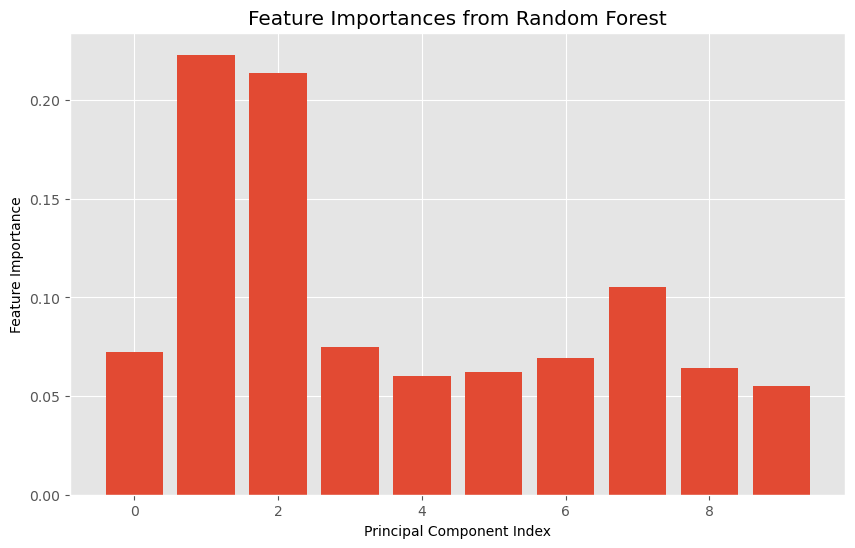

In [82]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, align='center')
plt.xlabel('Principal Component Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importances from Random Forest')
plt.show()

In [83]:
# Print the most important components
n_top_components = 3
top_component_indices = np.argsort(feature_importances)[::-1][:n_top_components]
print("Top", n_top_components, "Principal Components:")
for i, component_idx in enumerate(top_component_indices):
    print(f"Component {i+1}: {component_idx}")

Top 3 Principal Components:
Component 1: 1
Component 2: 2
Component 3: 7


In [84]:
original_feature_names = data.columns

In [85]:
print("Top Principal Components:")
for idx in top_component_indices:
    print(original_feature_names[idx])

Top Principal Components:
balance
day
Subscribed


# so we have 90% accuracy with Random Forest CLaasifier

# Hyperparameter Tuning for Random Forest Classifier

In [112]:
from sklearn.model_selection import RandomizedSearchCV

In [113]:
# Define the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)


In [114]:
# Define the random grid of hyperparameters to search
random_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [10, 20, 30],       
    'min_samples_split': [2, 5, 10],   
    'min_samples_leaf': [1, 2, 4],     
}

In [115]:
# Perform Randomized Search Cross Validation
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=random_grid, n_iter=10,
                                   cv=5, scoring='accuracy', random_state=42)

In [116]:
random_search.fit(X_train_over, y_train_over)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='accuracy')

In [117]:
# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}


In [118]:
# Print the best score found
print("Best Score:", random_search.best_score_)

Best Score: 0.9549067824527796


# now we got 95% accuracy

In [123]:
#Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

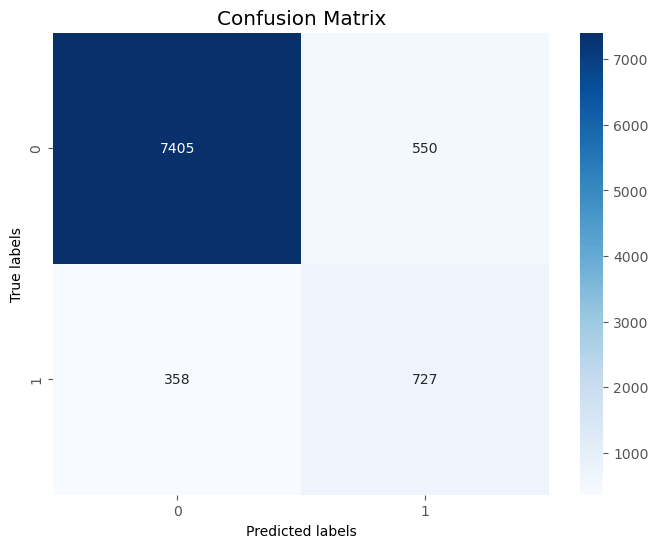

In [124]:
# Display confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True,fmt='d',   cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

# XGB model

In [86]:
!pip install xgboost

In [87]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [88]:
## Encode target variable

In [89]:
label_encoder = LabelEncoder()
data['Subscribed'] = label_encoder.fit_transform(data['Subscribed'])

In [90]:
# setting input and output data
X = data.drop('Subscribed', axis=1) 
y = data['Subscribed'] 

In [91]:
 #Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
#applying random oversampling
oversampler = RandomOverSampler( sampling_strategy = "minority",random_state = 2)

In [93]:
X_train_over,y_train_over = oversampler.fit_resample(X_train,y_train)

In [94]:
y_train_over.value_counts()

0    31956
1    31956
Name: Subscribed, dtype: int64

In [95]:
# Train the XGBoost model

In [96]:
model = XGBClassifier()
model.fit(X_train_over, y_train_over)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [97]:
 #Evaluate the model

In [98]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [99]:
# printing the results
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8747787610619469
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      7955
           1       0.49      0.79      0.60      1085

    accuracy                           0.87      9040
   macro avg       0.73      0.84      0.76      9040
weighted avg       0.91      0.87      0.89      9040



# Now we got 87% acuracy with XGB

# confusion matrix 

In [104]:
from sklearn.metrics import confusion_matrix

In [105]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

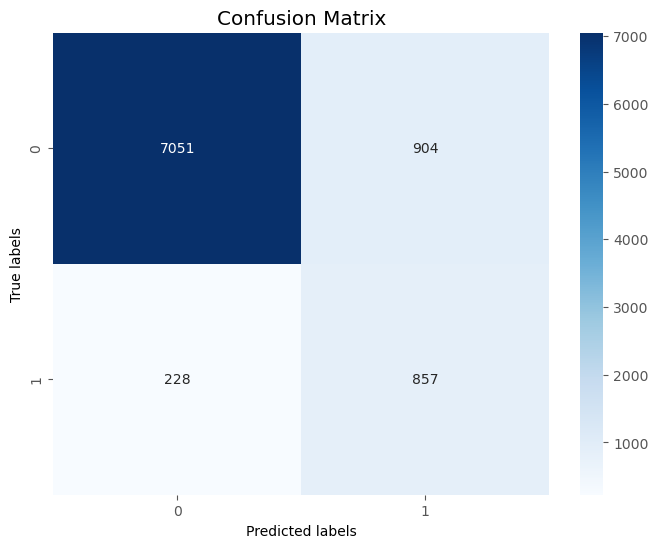

In [111]:
# Display confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True,fmt='d',   cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

# Hyperparameter tuning

In [102]:
from sklearn.model_selection import GridSearchCV

In [108]:
#Define hyperparameters grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9]
}


In [109]:
xgb = XGBClassifier()

In [110]:
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy')


In [111]:
grid_search.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.5, 0.7, 0.9],
                         'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 150],
                         'subsample': [0.5, 0.7, 0.9]},
             scoring='accuracy')

In [112]:
 #Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [113]:
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.7}
Accuracy: 0.8902654867256637
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      7955
           1       0.53      0.71      0.61      1085

    accuracy                           0.89      9040
   macro avg       0.75      0.81      0.77      9040
weighted avg       0.91      0.89      0.90      9040



# We got 89% accuracy